## 판다스(Pandas)

- 데이터프레임(DataFrame)과 시리즈(Series)로 불리는 데이터타입(DataType)과 데이터 분석을 위한 기능 제공 라이브러리

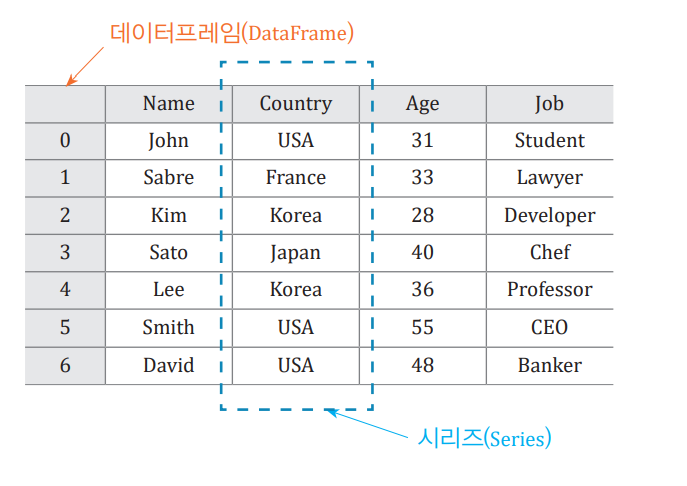

- 1차원 데이터타입 시리즈(Series) : 한 개의 열(column)을 나타내는 1차원 벡터(vector)
- `시리즈(Series)` 라벨(label)이 붙어있는 1차원 배열 자료구조 (여기서의 라벨(label)은 인덱스)
- 하나의 시리즈 내에서는 하나의 데이터타입만을 가질 수 있는 homogeneous 타입의 컨테이너(container)
------------------

- 2차원 데이터타입 데이터프레임(DataFrame) : 시리즈를 담고있는 컨테이너
- `데이터프레임(DataFrame)` 라벨(label)이 붙어있는 2차원 배열자료구조

In [1]:
import pandas as pd

In [2]:
A = ['John', 'Sabre', 'Kim', 'Sato', 'Lee','Smith']
B = ['USA', 'France', 'Korea', 'Japan', 'Korea', 'USA']
C = [31,33,28,40,36,55]
D = ['Student', 'Lawyer', 'Developer', 'Chef','Professor', 'CEO']

In [5]:
df = pd.DataFrame([A,B,C,D]).T
df

,0,1,2,3
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
3,Sato,Japan,40,Chef
4,Lee,Korea,36,Professor
5,Smith,USA,55,CEO


In [6]:
df.columns = ['이름', '국가','나이','직업']
df.index=['일','이','삼','사','오','육']
df

,이름,국가,나이,직업
일,John,USA,31,Student
이,Sabre,France,33,Lawyer
삼,Kim,Korea,28,Developer
사,Sato,Japan,40,Chef
오,Lee,Korea,36,Professor
육,Smith,USA,55,CEO


### 1. 데이터프레임 특정 행/열 추출

In [7]:
# 데이터프레임에서 연속적인 행(row) 데이터 추출

df[:3]

,이름,국가,나이,직업
일,John,USA,31,Student
이,Sabre,France,33,Lawyer
삼,Kim,Korea,28,Developer


In [9]:
df[3:5]

,이름,국가,나이,직업
사,Sato,Japan,40,Chef
오,Lee,Korea,36,Professor


In [11]:
# 데이터프레임에서 불연속적인 행(row) 데이터 추출

df.loc['일']

이름       John
국가        USA
나이         31
직업    Student
Name: 일, dtype: object

In [12]:
df.loc[['일','삼']]

,이름,국가,나이,직업
일,John,USA,31,Student
삼,Kim,Korea,28,Developer


In [13]:
df['이름']

일     John
이    Sabre
삼      Kim
사     Sato
오      Lee
육    Smith
Name: 이름, dtype: object

In [14]:
df[['이름','나이']]

,이름,나이
일,John,31
이,Sabre,33
삼,Kim,28
사,Sato,40
오,Lee,36
육,Smith,55


### 1-1. and/or 조건에 따른  열(column) 데이터 추출

In [15]:
df[(df['국가']!= 'USA') & (df['나이']>=33)]

,이름,국가,나이,직업
이,Sabre,France,33,Lawyer
사,Sato,Japan,40,Chef
오,Lee,Korea,36,Professor


### 2. 데이터프레임 직접 만들기

In [18]:
persons_dict = {'Name' : ['John', 'Sabre', 'Kim', 'Sato'],
               'Country' : ['USA','France', 'Korea','Japan'],
               'Age' : [31,33,27,40],
               'Job' : ['Student', 'Lawyer','Developer', 'Chef']}

df1 = pd.DataFrame(persons_dict)
df1

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,27,Developer
3,Sato,Japan,40,Chef


In [21]:
df2 = pd.DataFrame(persons_dict, columns=['Name','Age','Country','Job'])
df2

,Name,Age,Country,Job
0,John,31,USA,Student
1,Sabre,33,France,Lawyer
2,Kim,27,Korea,Developer
3,Sato,40,Japan,Chef


### 3. 데이터프레임 행과 열 삭제

In [23]:
df2.drop(df2.index[0])

,Name,Age,Country,Job
1,Sabre,33,France,Lawyer
2,Kim,27,Korea,Developer
3,Sato,40,Japan,Chef


In [25]:
df2.drop(df2.index[[1,3]])

,Name,Age,Country,Job
0,John,31,USA,Student
2,Kim,27,Korea,Developer


### 4. 판다스 결측값(Missing data)
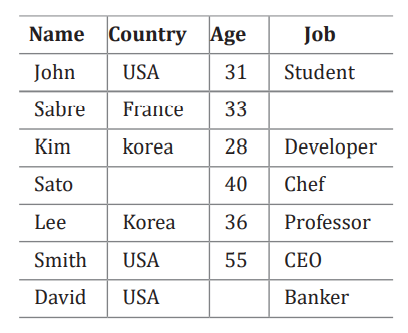

In [28]:
import numpy as np

In [30]:
# 결측값 확인

test_dict = {'Name' : ['John', 'Sabre', 'Kim', 'Sato','Lee','Smith','David'],
               'Country' : ['USA','France', 'Korea',np.NaN,'Korea','USA','USA'],
               'Age' : [31,33,28,40,36,55,np.NaN],
               'Job' : ['Student', np.NaN,'Developer', 'Chef', 'Professor', 'CEO','Banker']}

df = pd.DataFrame(test_dict)
df

,Name,Country,Age,Job
0,John,USA,31.0,Student
1,Sabre,France,33.0,NaN
2,Kim,Korea,28.0,Developer
3,Sato,NaN,40.0,Chef
4,Lee,Korea,36.0,Professor
5,Smith,USA,55.0,CEO
6,David,USA,NaN,Banker


In [31]:
df.isnull().sum()

Name       0
Country    1
Age        1
Job        1
dtype: int64

In [35]:
#결측값 처리

# fillna() 사용

df['Country'].fillna('Spain', inplace=True)
df['Age'].fillna(100.0, inplace=True)
df['Job'].fillna('Reporter', inplace=True)
df

,Name,Country,Age,Job
0,John,USA,31.0,Student
1,Sabre,France,33.0,Reporter
2,Kim,Korea,28.0,Developer
3,Sato,Spain,40.0,Chef
4,Lee,Korea,36.0,Professor
5,Smith,USA,55.0,CEO
6,David,USA,100.0,Banker


In [36]:
test_dict = {'Name' : ['John', 'Sabre', 'Kim', 'Sato','Lee','Smith','David'],
               'Country' : ['USA','France', 'Korea',np.NaN,'Korea','USA','USA'],
               'Age' : [31,33,28,40,36,55,np.NaN],
               'Job' : ['Student', np.NaN,'Developer', 'Chef', 'Professor', 'CEO','Banker']}

df = pd.DataFrame(test_dict)
df

,Name,Country,Age,Job
0,John,USA,31.0,Student
1,Sabre,France,33.0,NaN
2,Kim,Korea,28.0,Developer
3,Sato,NaN,40.0,Chef
4,Lee,Korea,36.0,Professor
5,Smith,USA,55.0,CEO
6,David,USA,NaN,Banker


In [37]:
df.fillna('AAA', inplace=True)
df

,Name,Country,Age,Job
0,John,USA,31.0,Student
1,Sabre,France,33.0,AAA
2,Kim,Korea,28.0,Developer
3,Sato,AAA,40.0,Chef
4,Lee,Korea,36.0,Professor
5,Smith,USA,55.0,CEO
6,David,USA,AAA,Banker


### 5. Pandas 문제

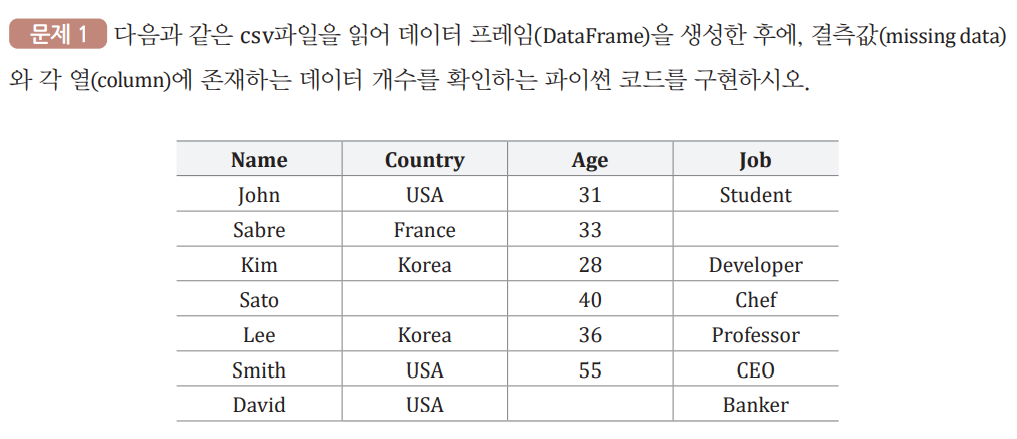

In [38]:
Q1 = {'Name':['John','Sabre','Kim','Sato','Lee','Smith','David'],
     'Country':['USA','France','Korea',np.NaN, 'Korea','USA','USA'],
     'Age':[31,33,28,40,36,55,np.NaN],
     'Job':['Student',np.NaN, 'Developer','Chef','Professor','CEO','Banker']}

Q_df = pd.DataFrame(Q1)
Q_df

,Name,Country,Age,Job
0,John,USA,31.0,Student
1,Sabre,France,33.0,NaN
2,Kim,Korea,28.0,Developer
3,Sato,NaN,40.0,Chef
4,Lee,Korea,36.0,Professor
5,Smith,USA,55.0,CEO
6,David,USA,NaN,Banker


In [39]:
Q_df.isnull().sum()

Name       0
Country    1
Age        1
Job        1
dtype: int64

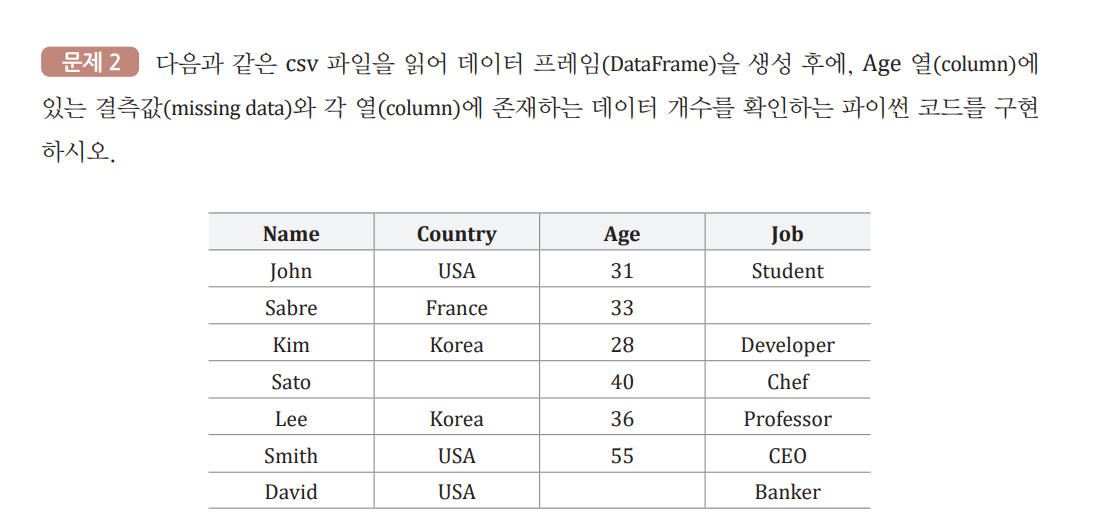

In [41]:
Q2 = {'Name':['John','Sabre','Kim','Sato','Lee','Smith','David'],
     'Country':['USA','France','Korea',np.NaN, 'Korea','USA','USA'],
     'Age':[31,33,28,40,36,55,np.NaN],
     'Job':['Student',np.NaN, 'Developer','Chef','Professor','CEO','Banker']}
Q_df = pd.DataFrame(Q2)

Q_df['Age'].isnull().sum()

1

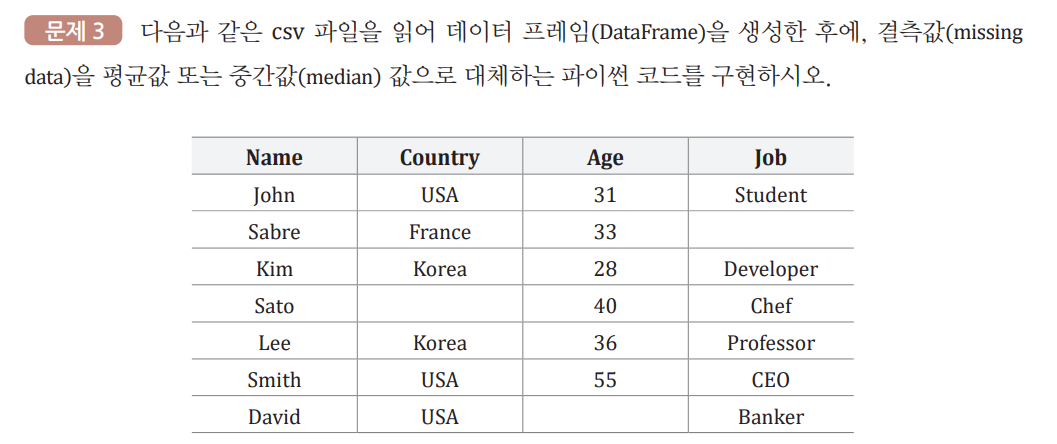

In [42]:
Q3 = {'Name':['John','Sabre','Kim','Sato','Lee','Smith','David'],
     'Country':['USA','France','Korea',np.NaN, 'Korea','USA','USA'],
     'Age':[31,33,28,40,36,55,np.NaN],
     'Job':['Student',np.NaN, 'Developer','Chef','Professor','CEO','Banker']}
Q_df = pd.DataFrame(Q3)

Q_df['Age'].fillna(Q_df['Age'].mean(), inplace=True)
Q_df

,Name,Country,Age,Job
0,John,USA,31.000000,Student
1,Sabre,France,33.000000,NaN
2,Kim,Korea,28.000000,Developer
3,Sato,NaN,40.000000,Chef
4,Lee,Korea,36.000000,Professor
5,Smith,USA,55.000000,CEO
6,David,USA,37.166667,Banker


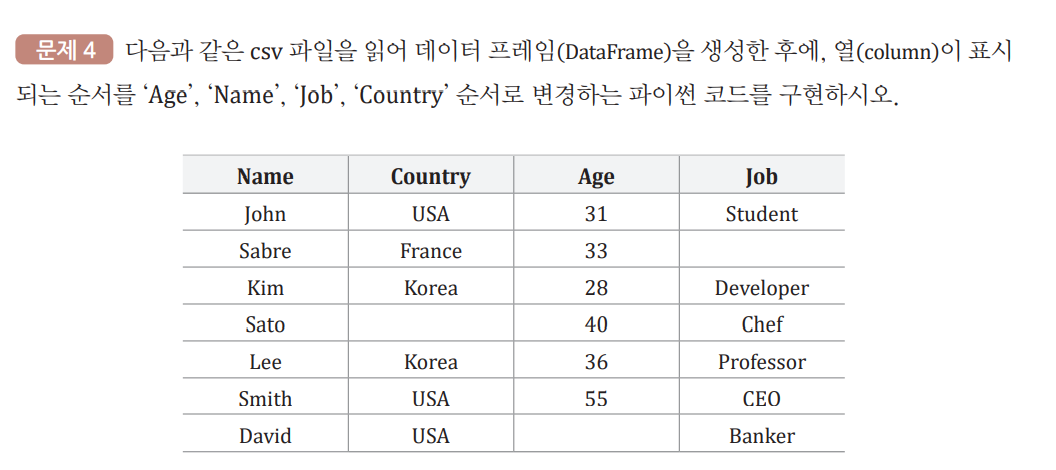

In [43]:
Q4 = {'Name':['John','Sabre','Kim','Sato','Lee','Smith','David'],
     'Country':['USA','France','Korea',np.NaN, 'Korea','USA','USA'],
     'Age':[31,33,28,40,36,55,np.NaN],
     'Job':['Student',np.NaN, 'Developer','Chef','Professor','CEO','Banker']}
Q_df = pd.DataFrame(Q4, columns=['Age','Name','Job','Country'])
Q_df

,Age,Name,Job,Country
0,31.0,John,Student,USA
1,33.0,Sabre,NaN,France
2,28.0,Kim,Developer,Korea
3,40.0,Sato,Chef,NaN
4,36.0,Lee,Professor,Korea
5,55.0,Smith,CEO,USA
6,NaN,David,Banker,USA
